<a href="https://colab.research.google.com/github/sgr1118/EX/blob/main/%5BExp_06%5D_NLP_lyrics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# 1. 데이터 불러오기
import glob
import re
import tensorflow as tf
txt_path = '/content/drive/MyDrive/Aiffel/EX/lyrics/*'
txt_list = glob.glob(txt_path)

raw_corpus = []

# 여러개의 txt 파일을 모두 읽어서 raw_corpus 에 담습니다.
for txt_file in txt_list:
  with open(txt_file, 'r') as f:
    raw = f.read().splitlines()
    raw_corpus.extend(raw)

print("데이터 크기:", len(raw_corpus))
print("Examples:\n", raw_corpus[:5])

# 라인단위로 split하여 저장

데이터 크기: 187088
Examples:
 ['The first words that come out', 'And I can see this song will be about you', "I can't believe that I can breathe without you", 'But all I need to do is carry on', 'The next line I write down']


In [32]:
# 2. 데이터 정제

# 공백인 문장 제외
for idx, sentence in enumerate(raw_corpus):
  if len(sentence) == 0: continue # 길이가 0인 문장은 건너뜁니다.

In [33]:
# 정규표현식을 사용하여 필터링
def preprocess_sentence(sentence):
  sentence = sentence.lower().strip() # 1. 소문자로 바꾸고, 양쪽 공백을 지웁니다
  sentence = re.sub(r"([?.!,¿])", r' \1 ', sentence) # 2. 특수문자 양쪽에 공백을 넣고
  sentence = re.sub(r'[" "]+', " ", sentence) # 3. 여러개의 공백은 하나의 공백으로 바꿉니다
  sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) # 4. a-zA-Z?.!,¿가 아닌 모든 문자를 하나의 공백으로 바꿉니다
  sentence = sentence.strip() # 5. 다시 양쪽 공백을 지웁니다
  sentence = '<start> ' + sentence + ' <end>' # 6. 문장 시작에는 <start>, 끝에는 <end>를 추가합니다
  return sentence
# 필요없는 과정은 빼도된다.
print(preprocess_sentence("This @_is ;;;sample        sentence."))

<start> this is sample sentence . <end>


In [34]:
# 정제한 문장 모으기
corpus = []

for sentence in raw_corpus:
  if len(sentence) == 0: continue
  if len(sentence) <= 3: continue # 처음과 끝 start와 end를 포함하고 길이가 3이라면 단어가 1개만 있는 경우이기때문에 분석에서 제외

  # 정제 후 담기
  preprocessd_sentence = preprocess_sentence(sentence)
  corpus.append(preprocessd_sentence)
# 문장에 단어 개수를 조절하여 넣어라
corpus[:4]

['<start> the first words that come out <end>',
 '<start> and i can see this song will be about you <end>',
 '<start> i can t believe that i can breathe without you <end>',
 '<start> but all i need to do is carry on <end>']

In [9]:
# corpus에서 각 문장의 길이를 출력하여 corpus_len에 저장
corpus_len = []
for sentence in corpus :
  w = len(sentence.split())
  corpus_len.append(w)

corpus_len

[8,
 12,
 12,
 11,
 8,
 12,
 12,
 20,
 22,
 15,
 14,
 14,
 15,
 8,
 10,
 20,
 18,
 15,
 14,
 14,
 16,
 7,
 22,
 14,
 15,
 27,
 15,
 14,
 14,
 16,
 9,
 11,
 10,
 9,
 7,
 19,
 11,
 8,
 18,
 9,
 8,
 15,
 8,
 9,
 9,
 16,
 8,
 8,
 15,
 12,
 7,
 17,
 8,
 9,
 9,
 17,
 11,
 8,
 18,
 8,
 9,
 15,
 8,
 9,
 18,
 8,
 12,
 12,
 11,
 7,
 12,
 18,
 7,
 7,
 8,
 12,
 8,
 16,
 9,
 9,
 10,
 9,
 9,
 10,
 26,
 7,
 7,
 8,
 12,
 8,
 15,
 9,
 11,
 13,
 7,
 7,
 8,
 12,
 8,
 20,
 10,
 5,
 3,
 16,
 9,
 7,
 14,
 8,
 10,
 6,
 19,
 10,
 9,
 11,
 9,
 9,
 18,
 8,
 16,
 14,
 5,
 19,
 10,
 9,
 11,
 9,
 9,
 19,
 12,
 9,
 12,
 9,
 12,
 20,
 10,
 9,
 11,
 9,
 9,
 19,
 13,
 6,
 6,
 6,
 13,
 9,
 10,
 8,
 8,
 10,
 13,
 7,
 10,
 9,
 6,
 18,
 12,
 8,
 7,
 17,
 8,
 6,
 8,
 19,
 21,
 10,
 11,
 13,
 11,
 9,
 11,
 14,
 13,
 23,
 12,
 6,
 10,
 13,
 6,
 11,
 9,
 7,
 9,
 19,
 21,
 10,
 11,
 13,
 11,
 9,
 11,
 10,
 11,
 12,
 11,
 13,
 13,
 19,
 6,
 6,
 6,
 10,
 25,
 10,
 11,
 13,
 11,
 9,
 11,
 10,
 11,
 12,
 11,
 13,
 13,
 21,
 16,
 9

In [10]:
# corpus_len 딕셔너리화
corpus_len_count = {} # 각 원소의 등장 횟수를 카운팅할 딕셔너리

for i in corpus_len:
    try: # 이미 등장한 값의 경우
        corpus_len_count[i] += 1
    except: # 처음 등장한 값의 경우
        corpus_len_count[i] = 1

print(corpus_len_count) # {'a': 2, 'b': 2, 'c': 1, 'd': 1}

{8: 20170, 12: 13516, 11: 15968, 20: 1512, 22: 989, 15: 6029, 14: 7924, 10: 17485, 18: 2510, 16: 4247, 7: 18104, 27: 333, 9: 19192, 19: 2050, 17: 3240, 26: 435, 13: 11080, 5: 7272, 3: 2086, 6: 12904, 21: 1170, 23: 842, 25: 544, 24: 702, 29: 211, 4: 4005, 30: 156, 28: 244, 31: 119, 34: 31, 32: 87, 39: 18, 40: 9, 38: 19, 33: 71, 37: 16, 42: 11, 36: 32, 67: 2, 69: 1, 61: 1, 50: 2, 48: 8, 35: 33, 138: 1, 65: 2, 121: 1, 46: 5, 44: 8, 68: 4, 55: 6, 60: 2, 54: 5, 43: 8, 47: 5, 53: 6, 57: 7, 45: 5, 58: 1, 77: 1, 2: 20, 63: 6, 51: 7, 56: 1, 75: 1, 92: 1, 90: 1, 82: 1, 72: 1, 52: 2, 41: 9, 123: 1, 98: 1, 153: 1, 134: 1, 78: 1, 86: 1, 101: 1, 85: 1, 119: 1, 266: 1, 74: 1, 49: 2, 347: 1, 71: 1, 104: 1, 259: 1}


In [11]:
# 문장 음절 빈도별 내림차순 출력
import operator
sdict = sorted(corpus_len_count.items(), key=operator.itemgetter(1), reverse=True)
sdict

# 이 같은 과정을 한 이유는 문장의 길이 분포가 몇 음절에 가장 많을까? 라는 생각을 확인해기위해 진행
# 또한, maxlen에 적절한 기준을 정하기에 참고하기 위해서였다.
# maxlen을 높이면 val_loss는 낮아지지만 padding으로 인해 tensor안에 0이 많이 생겨 낮아지는 것이다.
# 그러므로 아래 결과를 참고하여 maxlen을 설정한다.

[(8, 20170),
 (9, 19192),
 (7, 18104),
 (10, 17485),
 (11, 15968),
 (12, 13516),
 (6, 12904),
 (13, 11080),
 (14, 7924),
 (5, 7272),
 (15, 6029),
 (16, 4247),
 (4, 4005),
 (17, 3240),
 (18, 2510),
 (3, 2086),
 (19, 2050),
 (20, 1512),
 (21, 1170),
 (22, 989),
 (23, 842),
 (24, 702),
 (25, 544),
 (26, 435),
 (27, 333),
 (28, 244),
 (29, 211),
 (30, 156),
 (31, 119),
 (32, 87),
 (33, 71),
 (35, 33),
 (36, 32),
 (34, 31),
 (2, 20),
 (38, 19),
 (39, 18),
 (37, 16),
 (42, 11),
 (40, 9),
 (41, 9),
 (48, 8),
 (44, 8),
 (43, 8),
 (57, 7),
 (51, 7),
 (55, 6),
 (53, 6),
 (63, 6),
 (46, 5),
 (54, 5),
 (47, 5),
 (45, 5),
 (68, 4),
 (67, 2),
 (50, 2),
 (65, 2),
 (60, 2),
 (52, 2),
 (49, 2),
 (69, 1),
 (61, 1),
 (138, 1),
 (121, 1),
 (58, 1),
 (77, 1),
 (56, 1),
 (75, 1),
 (92, 1),
 (90, 1),
 (82, 1),
 (72, 1),
 (123, 1),
 (98, 1),
 (153, 1),
 (134, 1),
 (78, 1),
 (86, 1),
 (101, 1),
 (85, 1),
 (119, 1),
 (266, 1),
 (74, 1),
 (347, 1),
 (71, 1),
 (104, 1),
 (259, 1)]

In [12]:
# 말뭉치의 문장 길이
len(corpus) # 175514

175514

In [13]:
# 토큰화 (padding='post')
def tokenize(corpus):
  # 12000단어를 기억할 수 있는 tokenizer를 만들겁니다
  # 이미 문장을 정제했으니 filters가 필요없다.
  # 단어에 포함되지 못한 단어는 '<unk>'로 바꾼다
  tokenizer = tf.keras.preprocessing.text.Tokenizer(
  num_words=12000, filters = ' ', oov_token='<unk>')

  # corpus를 이용해 tokenizer 내부의 단어장을 완성합니다
  tokenizer.fit_on_texts(corpus)

  # 준비한 tokenizer를 이용해 corpus를 Tensor로 변환합니다
  tensor = tokenizer.texts_to_sequences(corpus)

  # 입력 데이터의 시퀀스 길이를 일정하게 맞춰줍니다. 컬럼의 수는 위에서 확인한 음절의 분포를 참고하여 
  # maxlen = 21를 사용하여 토큰 수 제한한다.
  # tensor의 슬라이싱을 대비하여 maxlen = 21
  # RNN에서 padding 방식은 'pre'가 더 유용하다고하지만 'post'를 사용하여 두 결과에 loss를 비교해볼 것이다.
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post', maxlen = 21)
  print(tensor, tokenizer)
  return tensor, tokenizer

tensor, tokenizer = tokenize(corpus)

[[   2    6  241 ...    0    0    0]
 [   2    8    5 ...    0    0    0]
 [   2    5   32 ...    0    0    0]
 ...
 [   2    9 1883 ... 6984    3    0]
 [   2    9  363 ...    0    0    0]
 [   2    9 1067 ...    0    0    0]] <keras_preprocessing.text.Tokenizer object at 0x7f0a6931d210>


In [37]:
# 토큰화 (padding='pre')
def tokenize(corpus):
  # 12000단어를 기억할 수 있는 tokenizer를 만들겁니다
  # 이미 문장을 정제했으니 filters가 필요없다.
  # 단어에 포함되지 못한 단어는 '<unk>'로 바꾼다
  tokenizer = tf.keras.preprocessing.text.Tokenizer(
  num_words=12000, filters = ' ', oov_token='<unk>')

  # corpus를 이용해 tokenizer 내부의 단어장을 완성합니다
  tokenizer.fit_on_texts(corpus)

  # 준비한 tokenizer를 이용해 corpus를 Tensor로 변환합니다
  tensor = tokenizer.texts_to_sequences(corpus)

  # 입력 데이터의 시퀀스 길이를 일정하게 맞춰줍니다. 컬럼의 수는 위에서 확인한 음절의 분포를 참고하여 
  # maxlen = 21를 사용하여 토큰 수 제한한다.
  # tensor의 슬라이싱을 대비하여 maxlen = 21
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre',maxlen = 21)
  print(tensor, tokenizer)
  return tensor, tokenizer

tensor, tokenizer = tokenize(corpus)

[[   0    0    0 ...   66   56    3]
 [   0    0    0 ...  113    7    3]
 [   0    0    0 ...  258    7    3]
 ...
 [   0    2    9 ...   38 6984    3]
 [   0    0    0 ...   11 1298    3]
 [   0    0    0 ... 2311   82    3]] <keras_preprocessing.text.Tokenizer object at 0x7f0a67fa3210>


In [38]:
# 결과 확인
tensor.shape

(175514, 21)

In [39]:
print(tensor[:3, :21]) # 3번째 행, 21번째 열까지 출력

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   2   6 241 425  17
   66  56   3]
 [  0   0   0   0   0   0   0   0   0   2   8   5  32  65  42 333  87  27
  113   7   3]
 [  0   0   0   0   0   0   0   0   0   2   5  32  15 217  17   5  32 795
  258   7   3]]


In [20]:
# 토크나이즈 index 확인
for idx in tokenizer.index_word:
  print(idx, ":", tokenizer.index_word[idx])

  if idx >= 10: break

1 : <unk>
2 : <start>
3 : <end>
4 : ,
5 : i
6 : the
7 : you
8 : and
9 : a
10 : to


In [40]:
# 평가 데이터셋 분리

# tensor에서 마지막 토큰을 잘라내서 소스 문장을 생성합니다
# 마지막 토큰은 <end>가 아니라 <pad>일 가능성이 높습니다.
src_input = tensor[:, :-1]
# tensor에서 <start>를 잘라내서 타겟 문장을 생성합니다
tgt_input = tensor[:, 1:]

#print(src_input[0])
#print(tgt_input[0])

from sklearn.model_selection import train_test_split
enc_train, enc_val, dec_train, dec_val = train_test_split(src_input, tgt_input,
                                                          test_size=0.2, 
                                                          random_state=10)

print(enc_train.shape, enc_val.shape, dec_train.shape, dec_val.shape)
# enc : 인코딩, dec : 디코딩

(140411, 20) (35103, 20) (140411, 20) (35103, 20)


In [41]:
BUFFER_SIZE = len(src_input)
BATCH_SIZE = 256
steps_per_epoch = len(src_input) // BATCH_SIZE
 # tokenizer가 구축한 단어사전 내 12000개와, 여기 포함되지 않은 0:<pad>를 포함하여 12001개
VOCAB_SIZE = tokenizer.num_words + 1

# 준비한 데이터 소스로부터 데이터셋을 만듭니다

dataset = tf.data.Dataset.from_tensor_slices((src_input, tgt_input))
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset

# https://www.tensorflow.org/api_docs/python/tf/data/Dataset 데이터셋 참고 문헌

<BatchDataset element_spec=(TensorSpec(shape=(256, 20), dtype=tf.int32, name=None), TensorSpec(shape=(256, 20), dtype=tf.int32, name=None))>

In [42]:
# 5.인공지능 만들기
class TextGenerator(tf.keras.Model):
  def __init__(self, vocab_size, embedding_size, hidden_size):
    super().__init__()

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
    self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
    self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
    self.linear = tf.keras.layers.Dense(vocab_size)

  def call(self, x):
    out = self.embedding(x)
    out = self.rnn_1(out)
    out = self.rnn_2(out)
    out = self.linear(out)

    return out

embedding_size = 256
hidden_size = 1024
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)
#embedding_size, hidden_size의 선택 기준을 적어두자

In [43]:
# 데이터셋에서 데이터 한 배치만 불러오기
for src_sample, tgt_sample in dataset.take(1): break
# 한 배치만 불러온 데이터를 모델에 넣어봅니다.
model(src_sample)

<tf.Tensor: shape=(256, 20, 12001), dtype=float32, numpy=
array([[[ 3.03275971e-04, -1.82066651e-05, -3.87320324e-05, ...,
          1.23459613e-04,  1.00718011e-04,  1.73130145e-04],
        [ 7.43762357e-04, -4.20966535e-05, -6.38836209e-05, ...,
          2.83792586e-04,  2.44655326e-04,  4.53235843e-04],
        [ 1.22793601e-03, -6.67831700e-05, -5.73790348e-05, ...,
          4.33264097e-04,  3.99307930e-04,  7.95492029e-04],
        ...,
        [ 1.18908542e-03, -5.17921580e-04, -2.89543696e-05, ...,
         -1.17543456e-03, -1.18414973e-04,  8.78997438e-04],
        [ 9.45556501e-04, -2.41255999e-04,  1.00743564e-04, ...,
         -1.31192035e-03,  3.03006847e-04,  8.28253513e-04],
        [ 7.37057824e-04, -1.24397018e-04,  2.07880992e-04, ...,
         -1.26313604e-03,  5.66161645e-04,  7.76383386e-04]],

       [[ 3.03275971e-04, -1.82066651e-05, -3.87320324e-05, ...,
          1.23459613e-04,  1.00718011e-04,  1.73130145e-04],
        [ 7.43762357e-04, -4.20966535e-05, -6

In [44]:
# summary 출력
model.summary()

# summary에 Output Shape가 없는 이유는 모델은 입력 시퀀스 길이를 모르기 때문이다.

Model: "text_generator_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     multiple                  3072256   
                                                                 
 lstm_5 (LSTM)               multiple                  5246976   
                                                                 
 lstm_6 (LSTM)               multiple                  8392704   
                                                                 
 dense_7 (Dense)             multiple                  12301025  
                                                                 
Total params: 29,012,961
Trainable params: 29,012,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# loss값 확인 (padding = 'post')
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

model.compile(loss=loss, optimizer=optimizer)
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

# 모델 학습
lstm_post = model.fit(enc_train, dec_train, batch_size=64, epochs=10, validation_data=(enc_val, dec_val))

Epoch 1/10
2194/2194 [==============================] - 107s 48ms/step - loss: 2.5216 - val_loss: 2.3092
Epoch 2/10
2194/2194 [==============================] - 104s 47ms/step - loss: 2.1934 - val_loss: 2.1612
Epoch 3/10
2194/2194 [==============================] - 104s 47ms/step - loss: 2.0325 - val_loss: 2.0732
Epoch 4/10
2194/2194 [==============================] - 104s 47ms/step - loss: 1.8981 - val_loss: 2.0142
Epoch 5/10
2194/2194 [==============================] - 104s 47ms/step - loss: 1.7766 - val_loss: 1.9758
Epoch 6/10
2194/2194 [==============================] - 104s 47ms/step - loss: 1.6656 - val_loss: 1.9498
Epoch 7/10
2194/2194 [==============================] - 104s 47ms/step - loss: 1.5643 - val_loss: 1.9334
Epoch 8/10
2194/2194 [==============================] - 104s 47ms/step - loss: 1.4720 - val_loss: 1.9242
Epoch 9/10
2194/2194 [==============================] - 104s 47ms/step - loss: 1.3866 - val_loss: 1.9198
Epoch 10/10
2194/2194 [==============================] 

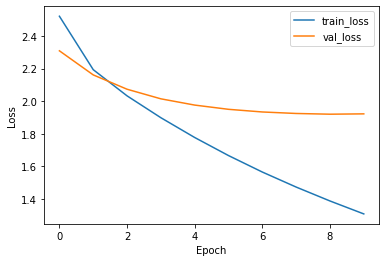

<Figure size 432x288 with 0 Axes>

In [ ]:
# 손실 그래프 그려보기 (padding = 'post')
import matplotlib.pyplot as plt
plt.plot(lstm_post.history['loss'])
plt.plot(lstm_post.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()
plt.tight_layout()

In [45]:
# loss값 확인 (padding = 'pre')
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

model.compile(loss=loss, optimizer=optimizer)
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

# 모델 학습
lstm_pre = model.fit(enc_train, dec_train, batch_size=64, epochs=10, validation_data=(enc_val, dec_val))

# padding = 'post'와비교하면 큰 차이는 없는 것으로 나타난다.

Epoch 1/10
2194/2194 [==============================] - 169s 76ms/step - loss: 2.7744 - val_loss: 2.4709
Epoch 2/10
2194/2194 [==============================] - 167s 76ms/step - loss: 2.3167 - val_loss: 2.2476
Epoch 3/10
2194/2194 [==============================] - 167s 76ms/step - loss: 2.1269 - val_loss: 2.1353
Epoch 4/10
2194/2194 [==============================] - 167s 76ms/step - loss: 1.9750 - val_loss: 2.0579
Epoch 5/10
2194/2194 [==============================] - 167s 76ms/step - loss: 1.8293 - val_loss: 2.0043
Epoch 6/10
2194/2194 [==============================] - 167s 76ms/step - loss: 1.6932 - val_loss: 1.9627
Epoch 7/10
2194/2194 [==============================] - 167s 76ms/step - loss: 1.5684 - val_loss: 1.9393
Epoch 8/10
2194/2194 [==============================] - 167s 76ms/step - loss: 1.4546 - val_loss: 1.9288
Epoch 9/10
2194/2194 [==============================] - 167s 76ms/step - loss: 1.3520 - val_loss: 1.9193
Epoch 10/10
2194/2194 [==============================] 

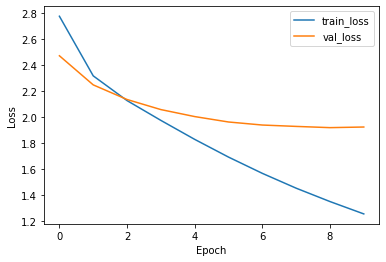

<Figure size 432x288 with 0 Axes>

In [46]:
# 손실 그래프 그려보기 (padding = 'pre')
import matplotlib.pyplot as plt
plt.plot(lstm_pre.history['loss'])
plt.plot(lstm_pre.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()
plt.tight_layout()

In [ ]:
# 가사 제출 함수 구현
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20):
    # 테스트를 위해서 입력받은 init_sentence도 텐서로 변환합니다
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    # 단어 하나씩 예측해 문장을 만듭니다
    #    1. 입력받은 문장의 텐서를 입력합니다
    #    2. 예측된 값 중 가장 높은 확률인 word index를 뽑아냅니다
    #    3. 2에서 예측된 word index를 문장 뒤에 붙입니다
    #    4. 모델이 <end>를 예측했거나, max_len에 도달했다면 문장 생성을 마칩니다
    while True:
        # 1
        predict = model(test_tensor) 
        # 2
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1] 
        # 3 
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)
        # 4
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    # tokenizer를 이용해 word index를 단어로 하나씩 변환합니다 
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated

In [ ]:
# 가사 제출
generate_text(model, tokenizer, init_sentence="<start> i love", max_len=20)

'<start> i love you , i love you , i love you so <end> '

# 시도는 했으나 실패한 방법들

- 불용어 제거를 시도하려했으나 분석에 사용하기 힘들어 포기하였다.

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# word_tokenize 진행
import nltk, tqdm
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

for word in tqdm(corpus):
  word_tokens = word_tokenize(word)
  corpus.append(word_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TypeError: ignored

In [ ]:
# 필요한 라이브러리 불러오기
from nltk.corpus import stopwords 
import tensorflow as tf
import nltk

# 토크나이저 진행
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=12000, filters = ' ', oov_token='<unk>')
tokenizer.fit_on_texts(corpus)

# 불용어 불러오기
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

result = []
for token in tokenizer.index_word:
    if token not in stop_words: 
      result.append(result) 

print(tokenizer.index_word) 
print(result[:1])

{1: '<unk>', 2: '<start>', 3: '<end>', 4: ',', 5: 'i', 6: 'the', 7: 'you', 8: 'and', 9: 'a', 10: 'to', 11: 'it', 12: 'me', 13: 'my', 14: 'in', 15: 't', 16: 's', 17: 'that', 18: 'on', 19: 'of', 20: 'your', 21: '.', 22: 'm', 23: 'we', 24: 'all', 25: 'like', 26: 'is', 27: 'be', 28: 'for', 29: 'up', 30: 'so', 31: 'with', 32: 'can', 33: 'love', 34: 'know', 35: 'but', 36: 'just', 37: 'don', 38: 'no', 39: 'oh', 40: 'what', 41: 'got', 42: 'this', 43: 'get', 44: '?', 45: 'they', 46: 'when', 47: 'do', 48: 'she', 49: 'yeah', 50: 'now', 51: 'baby', 52: 'if', 53: 'go', 54: 're', 55: 'he', 56: 'out', 57: 'was', 58: 'one', 59: '!', 60: 'down', 61: 'll', 62: 'want', 63: 'let', 64: 'there', 65: 'see', 66: 'come', 67: 'cause', 68: 'say', 69: 'her', 70: 'not', 71: 'at', 72: 'make', 73: 'time', 74: 'from', 75: 'back', 76: 'have', 77: 'are', 78: 'how', 79: 'never', 80: 'girl', 81: 'as', 82: 'man', 83: 'take', 84: 'right', 85: 'way', 86: 'wanna', 87: 'will', 88: 'im', 89: 'ain', 90: 'need', 91: 've', 92: 't

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 회고

1. 이번 프로젝트에서 어려웠던 점
 
 (1) 기존에 학습한 전처리 방식 이외에 불용어 제거를 시도해보았으나 성공하지 못했습니다. 할 수 있는 방법을 한번 더 생각해봐야할거 같습니다.

 (2) val_loss를 낮추기 위하여 적절한 파라미터가 무엇인지 maxlen을 몇으로 설정해야하는지 쉽지 않았습니다. maxlen을 21로 설정하면 val_loss가 낮아지기는 하였으나 좋지 않은 방법이라고 생각합니다. 배열이 길어질수록 padding에 의하여 0 값이 많아지기 때문에 val_loss가 낮아진것이기 때문이다.
 

2. 프로젝트를 진행하면서 알게된 부분 또는 아직 이해하지 못한 부분

(1) [양방향 LSTM](https://wegonnamakeit.tistory.com/25)

- LSTM을 사용하는 이유는 경사소실 문제로 학습이 잘 되지 못하는 RNN의 문제점을 개선하기 위해 사용
- LSTM은 장기의존성을 학습하는 개념을 담고있다. 그러나 언어는 뒤 단어가 앞 단어에 영향을 미치기도 한다. 예를들어 복수인지, 단수인지에 따라 앞에 'a'가 올 수도 있고 아닐 수도 있다. 이러한 역방향의 영향을 함께 구현하기위해 양방향 LSTM을 사용한다.
- 이번 EX에서 사용해보고싶었으나 오류를 해결하지못해 차후 코드를 수정하여 사용해볼 예정이다

(2) tokenizer에서 index_word를 하지않으면 반복할 수 없는 객체라는 것을 알 수 있었습니다.





참조

(1) [문장 음절 개수 세기](https://jimmy-ai.tistory.com/217)

(2) [Do it! 딥러닝 입문](http://www.kyobobook.co.kr/product/detailViewKor.laf?ejkGb=KOR&mallGb=KOR&barcode=9791163031093&orderClick=LAG&Kc=) (저자 : 박해선 / 참고한 내용 :RNN-순환신경망 이론 및 코드 / 참고한 페이지 : 280~318p)

(2) [파이썬 텍스트 마이닝 완벽 가이드](http://www.kyobobook.co.kr/product/detailViewKor.laf?ejkGb=KOR&mallGb=KOR&barcode=9791158393007&orderClick=LEa&Kc=) (저자 : 박상언, 강주영, 정석찬 / 참고한 내용 : Bi-LSTM 이론 및 코드 / 참고한 페이지 : 233~234p)

